# Nothing But NumPy: A 1-layer Binary Classification Neural Network on Iris Flowers

Part of the blog ["Nothing but NumPy: Understanding & Creating Binary Classification Neural Networks with Computational Graphs from Scratch"](https://medium.com/@rafayak/nothing-but-numpy-understanding-creating-binary-classification-neural-networks-with-e746423c8d5c)- by [Rafay Khan](https://twitter.com/RafayAK)

In this notebook we'll create a 1-layer neural network (i.e. just a output layer) and train it on Iris dataset using  _only_ **petals** as features input features to classify **Iris-virginica vs. others**

First, let's import NumPy, our layers, the Binary Cross-Entropy(bce) Cost function and helper functions.

Feel free to look into the helper functions in the utils directory.

In [1]:
import numpy as np
from Layers.LinearLayer import LinearLayer
from Layers.ActivationLayer import SigmoidLayer
from util.utilities import *
from util.cost_functions import compute_stable_bce_cost

# to show all the generated plots inline in the notebook
%matplotlib inline

![](imgs/verg_vs_other.png)

For convenience we'll load the data through [scikit-learn](https://scikit-learn.org/stable/index.html#). 

If you don't have it installed please refer to this [link](https://scikit-learn.org/stable/install.html)

In [2]:
# load data from scikit-learn's datasets module
from sklearn.datasets import load_iris

iris = load_iris()  # returns a python dictionary with the dataset

Let's see what the dataset contains:

In [3]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

- **data**: contains the 4 features of each example in a row, has 150 rows
- **target**: contains the label for each example _(0->setosa, 1->versicolor, 2->virginica)_
- **target_names**: contains the names of each target label
- **DESCR**: contains the desription of the dataset
- **feature_names**: contains the names of the 4 features(sepal length, sepal width, petal length, petal width)
- **filename** : where the file is located on the computer


Let's explore the data:

In [4]:
iris.data.shape  # rows(examples), cols(features)

(150, 4)

In [5]:
iris.target.shape # labels for 150 flowers 

(150,)

In [6]:
iris.target_names  # print the name of the 3 labels(species) the examples could belong to

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [7]:
iris.feature_names  # name of each feature in the data column

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.data[:5, :]  # print first 5 examples from the Iris dataset

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [9]:
iris.target[:5]  # print labels for the first 5 examples in the Iris dataset

array([0, 0, 0, 0, 0])

So, the data of the **first** 5 examples looks as follows:

| exmaple# | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | target | target name|
| --- | --- | --- || --- | --- | --- |
| 0 | 5.1 | 3.5 | 1.4 |  0.2| 0|  setosa
| 1 |4.9|  3. |  1.4|  0.2|0|  setosa
| 2 |4.7|  3.2|  1.3|  0.2|0|  setosa
| 3 |4.6|  3.1|  1.5|  0.2|0|  setosa
| 4 |5. |  3.6|  1.4|  0.2|0|  setosa

For our model we will only use **petal length and petal width** to classify whether the Iris flower is _virginica_ or _other_

In [10]:
# take only petal length(2nd col) and petal width(3rd col)
X = iris.data[:, 2:] 

# fix the labes shape so that instead of (150,) its (150,1),
# helps avoiding weird broadcasting errors
Y = (iris.target).reshape((150, 1))  

In [11]:
X.shape

(150, 2)

In [12]:
Y.shape

(150, 1)

**Notice** in the table above that the first 5 examples belong to __'setosa'__ species, this pattern continues in the dataset(the pattern is all _setosa_ examples followed by _versicolor_ examples and finally _virginica_ examples). ___A good practice is to randomize the data before training a neural network so that the neural network by accident does not learn a trivial ordering pattern in the data.___

So let's randomize the data

In [13]:
np.random.seed(48)  # for reproducible randomization 
random_indices = np.random.permutation(len(X))  # genrate random indices

X_train = X[random_indices]
Y_train = Y[random_indices]

Now let's again print the first 5 examples and see the results(note this time features are only two - petal lenght, petal width )

In [14]:
X_train[:5, :]

array([[ 4.2,  1.3],
       [ 4.7,  1.2],
       [ 5.6,  1.4],
       [ 1.3,  0.3],
       [ 4.8,  1.8]])

In [15]:
Y_train[:5]

array([[1],
       [1],
       [2],
       [0],
       [1]])

Now, the data of the **first** 5 examples looks as follows:

| exmaple# | petal length (cm) | petal width (cm) | target | target name|
| --- | --- | --- || --- | 
| 0 |  4.2|  1.3| 1|  versicolor 
| 1 |  4.7|  1.2| 1|  versicolor
| 2 |  5.6|  1.4| 2|  virginica
| 3 |  1.3|  0.3| 0|  setosa
| 4 |  4.8|  1.8| 1|  versicolor


Finally, let's put training set(`X_train`)  & and labels(`Y_train`) in the correct shape `(feat, examples)`, `(examples,1)`. Also we'll make the target label ___virginica=1___ and the rest ___0___.  

In [16]:
# Transpose the data so that it's in the correct shape 
# for passing through neural network
# also binarize the classes viginica=1 and the rest 0
X_train = X_train.T
Y_train = Y_train.T  
Y_train = (Y_train==2).astype('int')  # uses bool logic  to binarize labels, wherever label=2 output True(1) rest Flase(0)           

In [17]:
print("Shape of training data, X_train: {}".format(X_train.shape))
print("Shape of  labels, Y_train: {}".format(Y_train.shape))

Shape of training data, X_train: (2, 150)
Shape of  labels, Y_train: (1, 150)


In [18]:
Y_train[:, :5]  # print first five examples

array([[0, 0, 1, 0, 0]])

Before training the neural net let's visulaize the data:

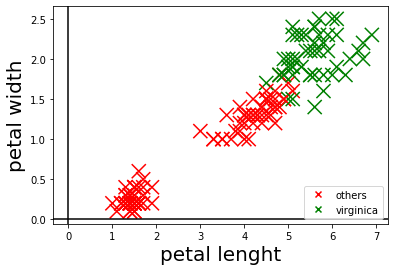

In [19]:
cmap = matplotlib.colors.ListedColormap(["red", "green"], name='from_list', N=None)
# scattter plot
scatter = plt.scatter(X_train.T[:, 0], X_train.T[:, 1], 
            s=200, c=np.squeeze(Y_train.T), 
            marker='x', cmap=cmap)  # s-> size of marker

plt.xlabel('petal lenght', size=20)
plt.ylabel('petal width', size=20)
plt.axhline(0, color='black')  # x-axis line
plt.axvline(0, color='black')  # y-axis line

plt.legend(scatter.legend_elements()[0], ['others', 'virginica'])

plt.show()

***
***

#### Now we are ready to setup and train the Neural Network

This is the neural net architecture we'll use

![](imgs/2in_1_layer_NN.png)

In [20]:
# define training constants
learning_rate = 1
number_of_epochs = 5000

np.random.seed(48) # set seed value so that the results are reproduceable
                   # (weights will now be initailzaed to the same pseudo-random numbers, each time)

# Our network architecture has the shape: 
#                       (input)--> [Linear->Sigmoid] -->(output)  


#------ LAYER-1 ----- define output layer that takes in training data 
Z1 = LinearLayer(input_shape=X_train.shape, n_out=1, ini_type='plain')
A1 = SigmoidLayer(Z1.Z.shape)

Now we can start the training loop:

In [21]:
costs = []  # initially empty list, this will store all the costs after a certain number of epochs

# Start training
for epoch in range(number_of_epochs):

    # ------------------------- forward-prop -------------------------
    Z1.forward(X_train)
    A1.forward(Z1.Z)
    
    # ---------------------- Compute Cost ----------------------------
    cost, dZ1 = compute_stable_bce_cost(Y_train, Z1.Z)
    # print and store Costs every 100 iterations and of the last iteration.
    if (epoch % 100) == 0 or epoch == number_of_epochs - 1:
        print("Cost at epoch#{}: {}".format(epoch, cost))
        costs.append(cost)    

    # ------------------------- back-prop ----------------------------        
    Z1.backward(dZ1)
      
    # ----------------------- Update weights and bias ----------------
    Z1.update_params(learning_rate=learning_rate)

Cost at epoch#0: 0.6940642470994395
Cost at epoch#100: 0.5444326702217493
Cost at epoch#200: 0.32202096974373146
Cost at epoch#300: 0.14014816058710747
Cost at epoch#400: 0.13339262652145972
Cost at epoch#500: 0.12803628892016888
Cost at epoch#600: 0.12355187616680463
Cost at epoch#700: 0.1197313837613812
Cost at epoch#800: 0.11642930164741146
Cost at epoch#900: 0.11354069211945084
Cost at epoch#1000: 0.11098788012194992
Cost at epoch#1100: 0.10871205967732583
Cost at epoch#1200: 0.10666782560989109
Cost at epoch#1300: 0.10481950855821856
Cost at epoch#1400: 0.10313865627391225
Cost at epoch#1500: 0.1016022635764503
Cost at epoch#1600: 0.10019150322565124
Cost at epoch#1700: 0.09889079932210257
Cost at epoch#1800: 0.0976871395896589
Cost at epoch#1900: 0.0965695572729011
Cost at epoch#2000: 0.09552873545963989
Cost at epoch#2100: 0.09455670110766981
Cost at epoch#2200: 0.0936465857167
Cost at epoch#2300: 0.09279243615004845
Cost at epoch#2400: 0.09198906364130163
Cost at epoch#2500: 0.

Now let's see how well the neural net peforms on the training data after the training as finished

`predict` helper functionin the cell below returns three things:

* `p`: predicted labels (output 1 if predictded output is greater than classification threshold `thresh`)
* `probas`: raw probabilities (how sure the neural net thinks the output is 1, this is just `P_hat`)
* `accuracy`: the number of correct predictions from total predictions



In [22]:
classifcation_thresh = 0.5


predicted_outputs, p_hat, accuracy = predict(X=X_train, Y=Y_train, 
                                             Zs=[Z1], As=[A1], thresh=classifcation_thresh)

print("The predicted outputs of first 5 examples: \n{}".format(predicted_outputs[:,:5]))
print("The predicted prbabilities of first 5 examples:\n {}".format(np.round(p_hat[:, :5], decimals=3)) )
print("\nThe accuracy of the model is: {}%".format(accuracy))

The predicted outputs of first 5 examples: 
[[ 0.  0.  1.  0.  1.]]
The predicted prbabilities of first 5 examples:
 [[ 0.012  0.022  0.542  0.     0.719]]

The accuracy of the model is: 96.0%


#### The Learning Curve

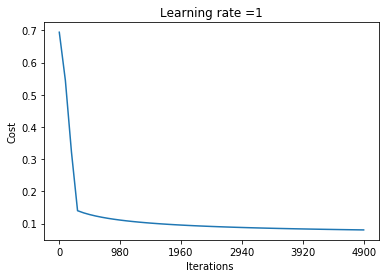

In [23]:
plot_learning_curve(costs, learning_rate, total_epochs=number_of_epochs)

#### The Decision Boundary

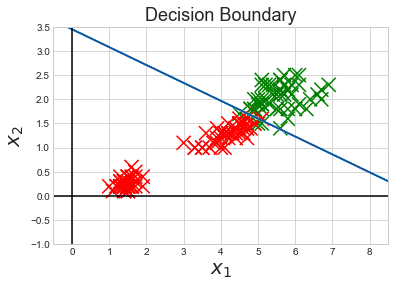

In [24]:
plot_decision_boundary(lambda x: predict_dec(Zs=[Z1], As=[A1], X=x.T, thresh=classifcation_thresh), 
                       X=X_train.T, Y=Y_train, axis_lines=True)

In the plot $x_1=petal\, lenght$ and $x_2=petal\, width$ and:

- `green`: virginica(1)
- `red`: others(0)



#### The Shaded Decision Boundary

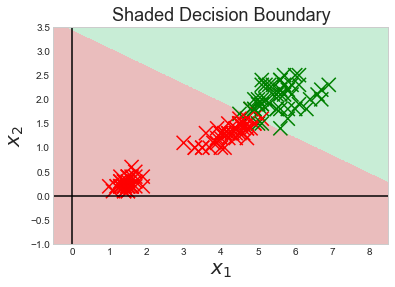

In [27]:
plot_decision_boundary_shaded(lambda x: predict_dec(Zs=[Z1], As=[A1], X=x.T, thresh=classifcation_thresh), 
                       X=X_train.T, Y=Y_train, axis_lines=True)

### Bonus

Try playing with the `classification_thresh` and visualize the effects